In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df.columns
# YearBuilt, YearRemodAdd, GarageYrBlt, MoSold, YrSold
# these are all the time related variables which we are going to delete
df.drop(['Id', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold'],axis=1,inplace=True)

In [8]:
# below is the code that i wrote without reading the data description which told that the na values assigned was not null
# value it was associated with the absense of the item.

In [8]:
# calculating missing plot and their percentage missing in the data
def find_missing_percentage():
    for i in range(df.shape[1]):
        print(f'{df.columns[i]} has {round((df.isna().sum()[i]/df.shape[0])*100,2)}% missing')
find_missing_percentage()

MSSubClass has 0.0% missing
MSZoning has 0.0% missing
LotFrontage has 17.74% missing
LotArea has 0.0% missing
Street has 0.0% missing
Alley has 93.77% missing
LotShape has 0.0% missing
LandContour has 0.0% missing
Utilities has 0.0% missing
LotConfig has 0.0% missing
LandSlope has 0.0% missing
Neighborhood has 0.0% missing
Condition1 has 0.0% missing
Condition2 has 0.0% missing
BldgType has 0.0% missing
HouseStyle has 0.0% missing
OverallQual has 0.0% missing
OverallCond has 0.0% missing
RoofStyle has 0.0% missing
RoofMatl has 0.0% missing
Exterior1st has 0.0% missing
Exterior2nd has 0.0% missing
MasVnrType has 0.55% missing
MasVnrArea has 0.55% missing
ExterQual has 0.0% missing
ExterCond has 0.0% missing
Foundation has 0.0% missing
BsmtQual has 2.53% missing
BsmtCond has 2.53% missing
BsmtExposure has 2.6% missing
BsmtFinType1 has 2.53% missing
BsmtFinSF1 has 0.0% missing
BsmtFinType2 has 2.6% missing
BsmtFinSF2 has 0.0% missing
BsmtUnfSF has 0.0% missing
TotalBsmtSF has 0.0% missing

In [9]:
# now we will delete the columns which has null values greater than 50% of the total data
# name of the columns to delete
# this function returns the names of the columns with missing values greater than x percentage
def missing_columns(x,dataframe):
    del_col = []
    for j in range(dataframe.shape[1]):
        if round((dataframe.isna().sum()[j]/dataframe.shape[0])*100,2) > x:
            del_col.append(dataframe.columns[j])
    return del_col

print(missing_columns(50,df))

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [118]:
# number of missing values and their respective columns
print([(df.isna().sum()[a],a) for a in missing_columns(50,df)])

[(1369, 'Alley'), (1453, 'PoolQC'), (1179, 'Fence'), (1406, 'MiscFeature')]


In [121]:
df.drop(missing_columns(50,df),axis=1,inplace=True)

In [117]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,NaN,NaN,0,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,NaN,NaN,0,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,NaN,NaN,0,WD,Normal,250000


In [12]:
# calculating the number of different class variable in the data
def n_class(x):
    return df.groupby(x).size()

In [13]:
# getting a lock at the total number of the values different values in a particular feature
for i in df.columns:
    print(n_class(i),'\n')

MSSubClass
20     536
30      69
40       4
45      12
50     144
60     299
70      60
75      16
80      58
85      20
90      52
120     87
160     63
180     10
190     30
dtype: int64 

MSZoning
C (all)      10
FV           65
RH           16
RL         1151
RM          218
dtype: int64 

LotFrontage
21.0     23
24.0     19
30.0      6
32.0      5
33.0      1
         ..
160.0     1
168.0     1
174.0     2
182.0     1
313.0     2
Length: 110, dtype: int64 

LotArea
1300      1
1477      1
1491      1
1526      1
1533      2
         ..
70761     1
115149    1
159000    1
164660    1
215245    1
Length: 1073, dtype: int64 

Street
Grvl       6
Pave    1454
dtype: int64 

LotShape
IR1    484
IR2     41
IR3     10
Reg    925
dtype: int64 

LandContour
Bnk      63
HLS      50
Low      36
Lvl    1311
dtype: int64 

Utilities
AllPub    1459
NoSeWa       1
dtype: int64 

LotConfig
Corner      263
CulDSac      94
FR2          47
FR3           4
Inside     1052
dtype: int64 

LandSlope
Gtl

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [15]:
pip install missingno

In [16]:
import missingno as msno
import pandas as pd

In [17]:
# calculating the number of columns which has missing values
missing_column = []
for i in df.columns:
    if (df.isna().sum()[i]/df.shape[0])*100 > 0:
        missing_column.append(i)
print(missing_column)

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [18]:
missing_df = df[missing_column]

<AxesSubplot:>

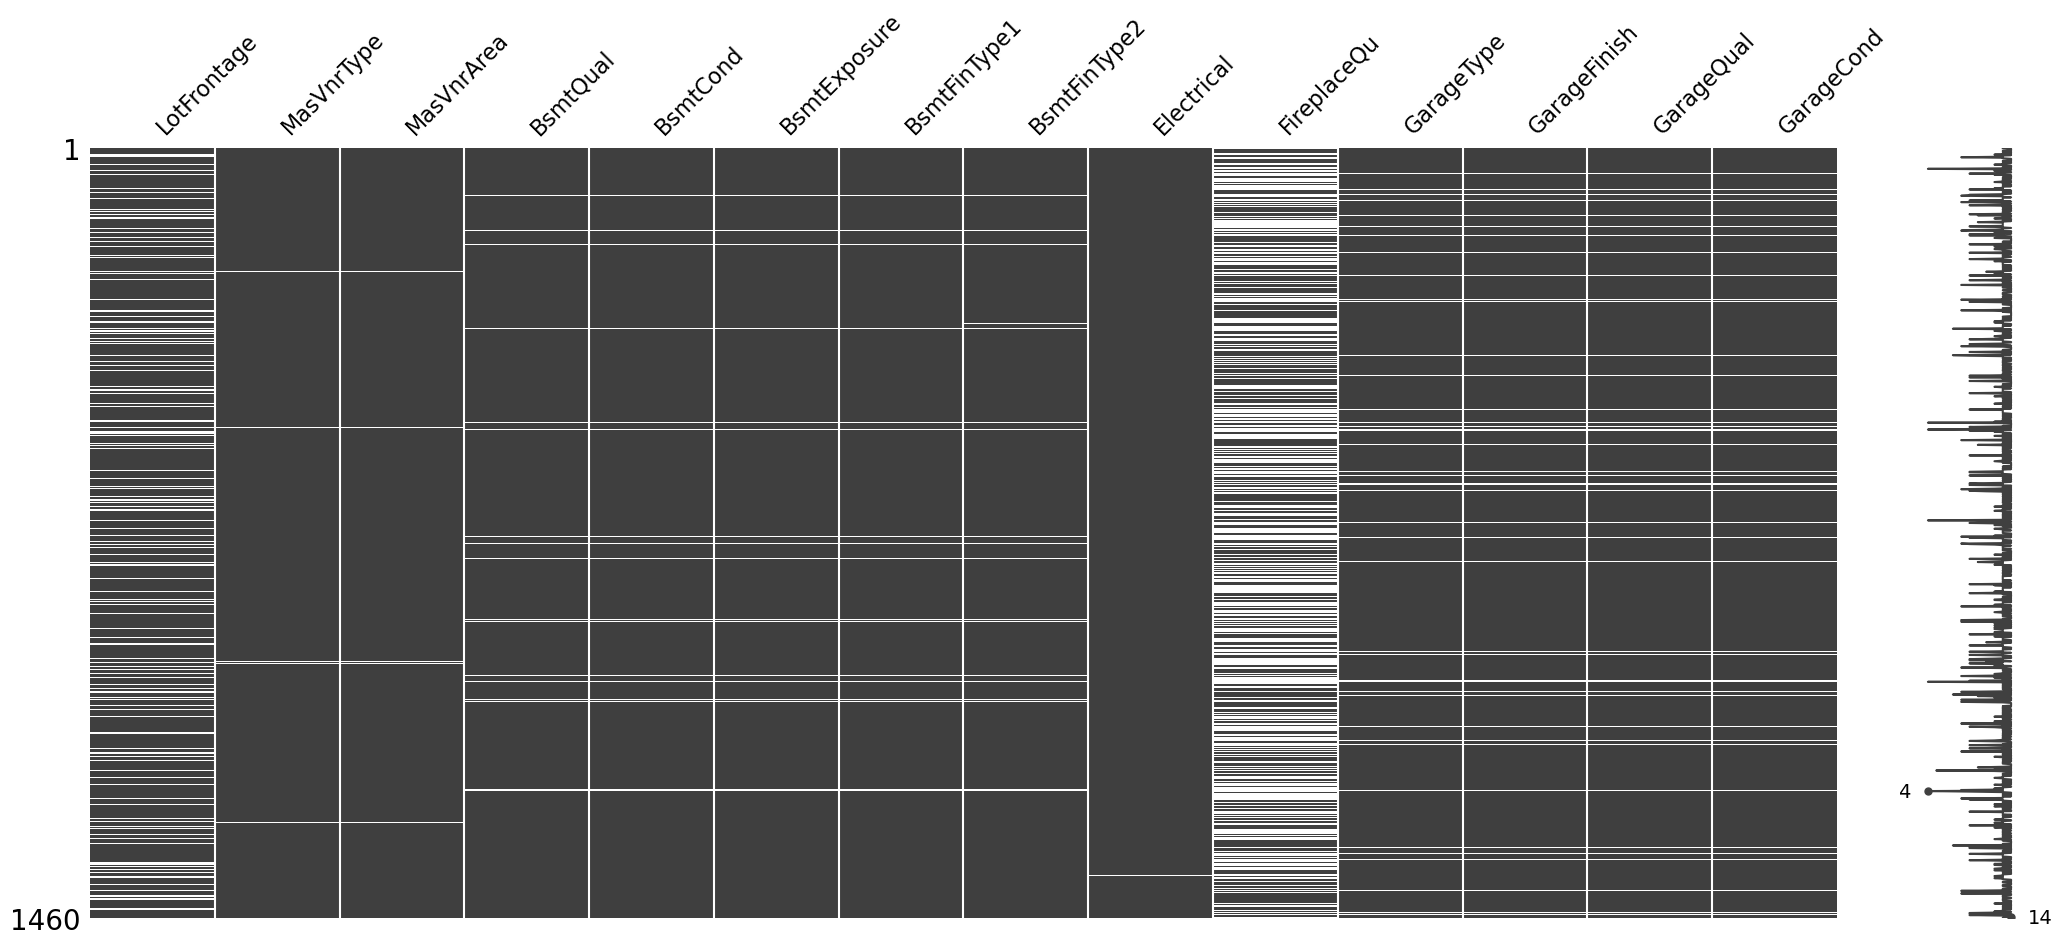

In [19]:
# Plot missingness
# to check if the data is missing at random or not missing at 


msno.matrix(missing_df)

In [20]:
# to check if all the row that has null values


# Check if each row has null values
rows_with_null = df.isnull().all(axis=1)

# Display rows where all values are null
print(df[rows_with_null])

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 71 columns]


In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(1460, 71)

In [23]:
# these are the rows which has the missing data in them and should be removed
missing_row = []

for i in range(missing_df.shape[0]):
    if missing_df.isnull().sum(axis=1)[i] > 10:
#         print(i,missing_df.isnull().sum(axis=1)[i])
        missing_row.append(i)
print(missing_row)

[]


In [24]:
df.drop(missing_row,axis=0)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,61,0,0,0,0,0,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,298,0,0,0,0,0,0,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,42,0,0,0,0,0,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,35,272,0,0,0,0,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,192,84,0,0,0,0,0,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,40,0,0,0,0,0,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,349,0,0,0,0,0,0,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,60,0,0,0,0,2500,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,366,0,112,0,0,0,0,WD,Normal,142125


In [96]:
find_missing_percentage()

MSSubClass has 0.0% missing
MSZoning has 0.0% missing
LotFrontage has 17.74% missing
LotArea has 0.0% missing
Street has 0.0% missing
LotShape has 0.0% missing
LandContour has 0.0% missing
Utilities has 0.0% missing
LotConfig has 0.0% missing
LandSlope has 0.0% missing
Neighborhood has 0.0% missing
Condition1 has 0.0% missing
Condition2 has 0.0% missing
BldgType has 0.0% missing
HouseStyle has 0.0% missing
OverallQual has 0.0% missing
OverallCond has 0.0% missing
RoofStyle has 0.0% missing
RoofMatl has 0.0% missing
Exterior1st has 0.0% missing
Exterior2nd has 0.0% missing
MasVnrType has 0.55% missing
MasVnrArea has 0.55% missing
ExterQual has 0.0% missing
ExterCond has 0.0% missing
Foundation has 0.0% missing
BsmtQual has 2.53% missing
BsmtCond has 2.53% missing
BsmtExposure has 2.6% missing
BsmtFinType1 has 2.53% missing
BsmtFinSF1 has 0.0% missing
BsmtFinType2 has 2.6% missing
BsmtFinSF2 has 0.0% missing
BsmtUnfSF has 0.0% missing
TotalBsmtSF has 0.0% missing
Heating has 0.0% missing

In [114]:
# using the missing column function to check the number of missing values in the features

# getting all the columns with more than 1 % missing columns
print(missing_columns(1,df))

['LotFrontage', 'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [123]:
print(missing_columns(30,df))

['FireplaceQu']


In [124]:
df.FireplaceQu

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object

In [59]:
# calculating the number of different class variable in the data
def n_class(x):
    return df.groupby(x).size()

In [60]:
# separating all the columns which are categorical and from continuous variable
# calculating the approximate number of variables that can be categorical
cat_continuous_features = []
for j in continuous_features.columns:
    if len(n_class(j)) <= 20:
        cat_continuous_features.append(j)
cat_continuous_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea']

In [54]:
numerical_features_vector = [j for j in continuous_features.columns if j not in cat_continuous_features]
print(numerical_features_vector)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']


In [39]:
categorical_features = df[cat_continuous_features]
categorical_features

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea
0,60,7,5,1,0,2,1,3,1,8,0,2,0,0
1,20,6,8,0,1,2,0,3,1,6,1,2,0,0
2,60,7,5,1,0,2,1,3,1,6,1,2,0,0
3,70,7,5,1,0,1,0,3,1,7,1,3,0,0
4,60,8,5,1,0,2,1,4,1,9,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,0,0,2,1,3,1,7,1,2,0,0
1456,20,6,6,1,0,2,0,3,1,7,2,2,0,0
1457,70,7,9,0,0,2,0,4,1,9,2,1,0,0
1458,20,5,6,1,0,1,0,2,1,5,0,1,0,0


In [1]:
numerical_features = df[numerical_features_vector]
numerical_features.columns

NameError: name 'df' is not defined

In [64]:
real_categorical_features = [i for i in df.columns if i not in continuous_features]
real_categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [69]:
total_categorical_features = pd.concat([categorical_features,df[real_categorical_features]],axis=1)

In [79]:
total_numerical_features = numerical_features.drop('SalePrice',axis=1)

In [80]:
total_categorical_features.shape

(1460, 53)

In [81]:
total_numerical_features.shape

(1460, 17)

In [82]:
df.shape

(1460, 71)

In [83]:
# now transforming the categorical data using onehotencoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe_data = ohe.fit_transform(total_categorical_features)

In [84]:
ohe_data.shape

(1460, 360)

In [85]:
target_variable = df['SalePrice']

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(total_numerical_features)

In [87]:
scaled_data

array([[-0.20803433, -0.20714171,  0.51001534, ..., -0.3593249 ,
        -0.27020835, -0.08768781],
       [ 0.40989452, -0.09188637, -0.57283458, ..., -0.3593249 ,
        -0.27020835, -0.08768781],
       [-0.08444856,  0.07347998,  0.32217403, ..., -0.3593249 ,
        -0.27020835, -0.08768781],
       ...,
       [-0.16683907, -0.14781027, -0.57283458, ..., -0.3593249 ,
        -0.27020835,  4.95311151],
       [-0.08444856, -0.08016039, -0.57283458, ...,  1.47378925,
        -0.27020835, -0.08768781],
       [ 0.20391824, -0.05811155, -0.57283458, ..., -0.3593249 ,
        -0.27020835, -0.08768781]])

In [92]:
pd.DataFrame(scaled_data,columns = total_numerical_features.columns)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal
0,-0.208034,-0.207142,0.510015,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,0.351000,-0.752176,0.216503,-0.359325,-0.270208,-0.087688
1,0.409895,-0.091886,-0.572835,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.060731,1.626195,-0.704483,-0.359325,-0.270208,-0.087688
2,-0.084449,0.073480,0.322174,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,0.631726,-0.752176,-0.070361,-0.359325,-0.270208,-0.087688
3,-0.414011,-0.096897,-0.572835,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,0.790804,-0.752176,-0.176048,4.092524,-0.270208,-0.087688
4,0.574676,0.375148,1.360826,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,1.299326,1.698485,0.780197,0.563760,-0.359325,-0.270208,-0.087688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.331620,-0.260560,-0.572835,-0.973018,-0.288653,0.873321,-0.238122,-0.542435,0.795198,-0.120242,0.250402,-0.060731,-0.752176,-0.100558,-0.359325,-0.270208,-0.087688
1456,0.615871,0.266407,0.084610,0.759659,0.722112,0.049262,1.104925,2.355701,-0.795163,-0.120242,1.061367,0.126420,2.033231,-0.704483,-0.359325,-0.270208,-0.087688
1457,-0.166839,-0.147810,-0.572835,-0.369871,-0.288653,0.701265,0.215641,0.065656,1.844744,-0.120242,1.569647,-1.033914,-0.752176,0.201405,-0.359325,-0.270208,4.953112
1458,-0.084449,-0.080160,-0.572835,-0.865548,6.092188,-1.284176,0.046905,-0.218982,-0.795163,-0.120242,-0.832788,-1.090059,2.168910,-0.704483,1.473789,-0.270208,-0.087688


In [89]:
total_numerical_features

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,1647,460,0,40,0,0,0
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,2073,500,349,0,0,0,0
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,2340,252,0,60,0,0,2500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,1078,240,366,0,112,0,0


In [10]:
# LotFrontage,LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,
# GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal

# after reading the data description we understood that the above mentioned features are the numerical
# and all the remaining others are categorical features.


In [12]:
numerical_data = ['LotFrontage','LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

In [11]:
numerical_variable = df[numerical_data]    # contains all the numerical features

In [12]:
categorical_data = [j for j in df.columns if j not in numerical_data]

In [13]:
categorical_variable = df[categorical_data].drop('SalePrice',axis=1)     # contains all the categorical features 
target_variable = df['SalePrice']    # contains the target variable 

# Data Visualisation

### Now we will perform onehotencoding on the categorical variables and StandardScaling on the numerical variables

In [14]:
df.shape

(1460, 75)

In [15]:
df.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
                 ... 
MiscFeature      1406
MiscVal             0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 75, dtype: int64

In [16]:
# a function which gives the column names of all the variables that have nan values greater than x percent

def missing_columns(x,dataframe):
    del_col = []
    for j in range(dataframe.shape[1]):
        if round((dataframe.isna().sum()[j]/dataframe.shape[0])*100,2) > x:
            del_col.append(dataframe.columns[j])
    return del_col


In [17]:
print(missing_columns(0,df))

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [18]:
# if any of these nan are in numerical_variable then they can be treated as null values other wise these nan values are treated as
# not presence of these values
259/1460

0.1773972602739726

In [19]:
# nan values which are in the numerical data
df[[i for i in numerical_feature.columns if i in missing_columns(0,df)]].isna().sum()

NameError: name 'numerical_feature' is not defined

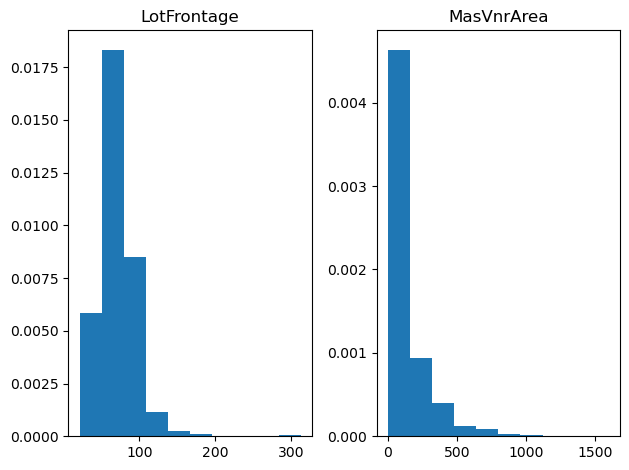

In [20]:
# checking the distribution to fill in the missing values in the columns
fig,axes = plt.subplots(1,2)
axes[0].hist(df['LotFrontage'],density=True)
axes[0].set_title('LotFrontage')

axes[1].hist(df['MasVnrArea'],density=True)
axes[1].set_title('MasVnrArea')


plt.tight_layout()

In [21]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [22]:
df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [23]:
for i in df.groupby('LotFrontage').size():
    print(i)

23
19
6
5
1
10
9
6
5
1
1
12
6
4
12
9
3
1
5
6
4
57
15
14
10
6
17
5
12
7
13
143
8
9
17
19
44
15
12
19
11
70
12
17
18
15
53
11
9
25
17
69
6
12
5
9
40
10
5
10
6
23
6
10
8
6
7
8
2
8
3
16
2
4
3
3
6
1
7
3
2
6
1
1
2
2
2
2
7
2
2
2
1
2
3
2
1
1
1
1
1
1
1
1
1
1
1
2
1
2


In [24]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [25]:
df['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [26]:
# Replacing the null values with median of the data in case of MasVnrArea
numerical_variable['MasVnrArea'].fillna(numerical_variable['MasVnrArea'].median(), inplace=True)


C:\Users\Palash\AppData\Local\Temp\ipykernel_6312\1537148181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_variable['MasVnrArea'].fillna(numerical_variable['MasVnrArea'].median(), inplace=True)


In [27]:
# Replacing the null values with median of the data in case of LotFrontage
numerical_variable['LotFrontage'].fillna(numerical_variable['LotFrontage'].median(), inplace=True)



C:\Users\Palash\AppData\Local\Temp\ipykernel_6312\111727690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_variable['LotFrontage'].fillna(numerical_variable['LotFrontage'].median(), inplace=True)


In [28]:
# checking if the missing values were filled or not 
numerical_variable.isna().sum()

LotFrontage      0
LotArea          0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
dtype: int64

In [29]:
# converting the categorical data into zeros and ones
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
encoded_data  = ohe.fit_transform(categorical_variable)

In [30]:
for i in pd.DataFrame(encoded_data.toarray()).isna().sum():
    if i > 0:
        print('yes')

In [31]:
pd.DataFrame(encoded_data.toarray())

,0,1,2,3,4,5,6,7,8,9,...,330,331,332,333,334,335,336,337,338,339
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
# now standard scaling the entire data frame we get
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_data = ss.fit_transform(numerical_variable) #converting the data into same scale

In [33]:
scaled_numerical_variable = pd.DataFrame(scaled_data,columns=numerical_variable.columns)

In [34]:
scaled_numerical_variable

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,BsmtFullBath,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,-0.220875,-0.207142,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,...,1.107810,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
1,0.460320,-0.091886,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,...,-0.819964,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
2,-0.084636,0.073480,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,...,1.107810,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
3,-0.447940,-0.096897,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,...,1.107810,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688
4,0.641972,0.375148,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,...,1.107810,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.357114,-0.260560,-0.570750,-0.973018,-0.288653,0.873321,-0.238122,-0.542435,0.795198,-0.120242,...,-0.819964,0.311725,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
1456,0.687385,0.266407,0.087911,0.759659,0.722112,0.049262,1.104925,2.355701,-0.795163,-0.120242,...,1.107810,0.311725,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688
1457,-0.175462,-0.147810,-0.570750,-0.369871,-0.288653,0.701265,0.215641,0.065656,1.844744,-0.120242,...,-0.819964,-1.026858,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112
1458,-0.084636,-0.080160,-0.570750,-0.865548,6.092188,-1.284176,0.046905,-0.218982,-0.795163,-0.120242,...,1.107810,-1.026858,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688


In [35]:
encoded_categorical_variable= pd.DataFrame(encoded_data.toarray())

In [36]:
transformed_data = pd.concat([scaled_numerical_variable,encoded_categorical_variable],axis=1)

In [37]:
# Applying Linear Regression in the data we get
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model1 = lr.fit(transformed_data,target_variable)

C:\Users\Palash\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [38]:
# using cross validation to find the accuracy of the data

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 10
kfolds = KFold(n_splits = num_folds, random_state = 2, shuffle=True)

results = cross_val_score(model1,transformed_data,target_variable,cv=kfolds,scoring='r2')

C:\Users\Palash\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Palash\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Palash\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Palash\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Palash\anaconda

In [39]:
results

array([-3.85143659e+17, -1.65532569e+17, -1.28700505e+16, -1.56047570e+19,
       -8.68093386e+18, -9.29668486e+14, -6.05552474e+19, -1.33198998e+19,
       -5.56759346e+18, -1.13167151e+20])

In [40]:
np.mean(results)

-2.174600586165031e+19

### Forward Selection

In [41]:
pip install mlxtend

In [42]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression


In [43]:
transformed_data

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,330,331,332,333,334,335,336,337,338,339
0,-0.220875,-0.207142,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.460320,-0.091886,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.084636,0.073480,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.447940,-0.096897,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.641972,0.375148,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.357114,-0.260560,-0.570750,-0.973018,-0.288653,0.873321,-0.238122,-0.542435,0.795198,-0.120242,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.687385,0.266407,0.087911,0.759659,0.722112,0.049262,1.104925,2.355701,-0.795163,-0.120242,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,-0.175462,-0.147810,-0.570750,-0.369871,-0.288653,0.701265,0.215641,0.065656,1.844744,-0.120242,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,-0.084636,-0.080160,-0.570750,-0.865548,6.092188,-1.284176,0.046905,-0.218982,-0.795163,-0.120242,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
target_variable

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [45]:
sfs = SFS(LinearRegression(), k_features=30,forward=True, floating=False, scoring='r2', cv=0)
sfs.fit(transformed_data, target_variable)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(),
                          k_features=(30, 30), scoring='r2')

In [46]:
selected_features = sfs.k_feature_names_
print("Selected features:", selected_features)

Selected features: ('LotArea', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 5, 16, 18, 36, 49, 58, 81, 104, 105, 106, 107, 110, 114, 123, 170, 182, 185, 193, 222, 236, 249, 252, 274, 331, 338)


In [87]:
sfs.k_score_

0.9061734431431958

In [88]:
transformed_data[list(selected_features)]

,LotArea,BsmtFinSF1,TotalBsmtSF,GrLivArea,GarageCars,5,16,18,36,49,...,182,185,193,222,236,249,252,274,331,338
0,-0.207142,0.575425,-0.459303,0.370333,0.311725,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,-0.091886,1.171992,0.466465,-0.482512,0.311725,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.073480,0.092907,-0.313369,0.515013,0.311725,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,-0.096897,-0.499274,-0.687324,0.383659,1.650307,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.375148,0.463568,0.199680,1.299326,1.650307,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260560,-0.973018,-0.238122,0.250402,0.311725,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1456,0.266407,0.759659,1.104925,1.061367,0.311725,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1457,-0.147810,-0.369871,0.215641,1.569647,-1.026858,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1458,-0.080160,-0.865548,0.046905,-0.832788,-1.026858,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [89]:
model2 = lr.fit(transformed_data[list(selected_features)],target_variable)

C:\Users\Palash\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [90]:
predicted_value = model2.predict(transformed_data[list(selected_features)])

C:\Users\Palash\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [91]:
from sklearn.metrics import r2_score

In [92]:
r2_score(predicted_value,target_variable)

0.8964585007795495

## Convert to Dataframe

In [47]:
transformed_data

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,330,331,332,333,334,335,336,337,338,339
0,-0.220875,-0.207142,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.460320,-0.091886,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.084636,0.073480,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.447940,-0.096897,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.641972,0.375148,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.357114,-0.260560,-0.570750,-0.973018,-0.288653,0.873321,-0.238122,-0.542435,0.795198,-0.120242,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.687385,0.266407,0.087911,0.759659,0.722112,0.049262,1.104925,2.355701,-0.795163,-0.120242,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,-0.175462,-0.147810,-0.570750,-0.369871,-0.288653,0.701265,0.215641,0.065656,1.844744,-0.120242,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,-0.084636,-0.080160,-0.570750,-0.865548,6.092188,-1.284176,0.046905,-0.218982,-0.795163,-0.120242,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
target_variable

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [49]:
transformed_data['target_variable'] = target_variable

In [50]:
transformed_data

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,331,332,333,334,335,336,337,338,339,target_variable
0,-0.220875,-0.207142,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,208500
1,0.460320,-0.091886,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,181500
2,-0.084636,0.073480,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,223500
3,-0.447940,-0.096897,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,140000
4,0.641972,0.375148,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.357114,-0.260560,-0.570750,-0.973018,-0.288653,0.873321,-0.238122,-0.542435,0.795198,-0.120242,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,175000
1456,0.687385,0.266407,0.087911,0.759659,0.722112,0.049262,1.104925,2.355701,-0.795163,-0.120242,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,210000
1457,-0.175462,-0.147810,-0.570750,-0.369871,-0.288653,0.701265,0.215641,0.065656,1.844744,-0.120242,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,266500
1458,-0.084636,-0.080160,-0.570750,-0.865548,6.092188,-1.284176,0.046905,-0.218982,-0.795163,-0.120242,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,142125


In [51]:
transformed_data.to_csv('regression')

In [52]:
df = transformed_data

In [53]:
df['target_variable']=target_variable

In [54]:
df

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,331,332,333,334,335,336,337,338,339,target_variable
0,-0.220875,-0.207142,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,208500
1,0.460320,-0.091886,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,181500
2,-0.084636,0.073480,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,223500
3,-0.447940,-0.096897,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,140000
4,0.641972,0.375148,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.357114,-0.260560,-0.570750,-0.973018,-0.288653,0.873321,-0.238122,-0.542435,0.795198,-0.120242,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,175000
1456,0.687385,0.266407,0.087911,0.759659,0.722112,0.049262,1.104925,2.355701,-0.795163,-0.120242,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,210000
1457,-0.175462,-0.147810,-0.570750,-0.369871,-0.288653,0.701265,0.215641,0.065656,1.844744,-0.120242,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,266500
1458,-0.084636,-0.080160,-0.570750,-0.865548,6.092188,-1.284176,0.046905,-0.218982,-0.795163,-0.120242,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,142125


In [55]:
df.corr()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,331,332,333,334,335,336,337,338,339,target_variable
LotFrontage,1.000000,0.304522,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,...,0.128995,-0.023074,-0.091864,-0.021725,-0.036570,-0.018040,0.016250,-0.074146,0.127293,0.334771
LotArea,0.304522,1.000000,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,...,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635,0.263843
MasVnrArea,0.178469,0.103321,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,...,0.165692,-0.025899,-0.128187,-0.043861,-0.011783,-0.013748,-0.009535,-0.081539,0.162205,0.472614
BsmtFinSF1,0.214367,0.214103,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,...,0.044883,0.010652,-0.024778,-0.024832,-0.014874,0.021369,0.000765,-0.019560,0.044912,0.386420
BsmtFinSF2,0.042463,0.111170,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,...,-0.087162,-0.013098,0.036178,0.048347,-0.015130,-0.026277,-0.007929,0.041207,-0.085761,-0.011378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,-0.018040,0.008966,-0.013748,0.021369,-0.026277,-0.059130,-0.047002,0.068107,-0.020234,-0.010946,...,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856,-0.015525
337,0.016250,-0.010781,-0.009535,0.000765,-0.007929,0.021534,0.019569,0.021949,-0.027180,-0.014171,...,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062,-0.046480
338,-0.074146,0.005711,-0.081539,-0.019560,0.041207,-0.153930,-0.160222,-0.158772,0.031766,-0.012476,...,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323,-0.153990
339,0.127293,0.022635,0.162205,0.044912,-0.085761,0.249315,0.266268,0.221037,0.004852,-0.036793,...,0.986819,-0.013885,-0.769559,-0.083419,-0.016038,-0.027856,-0.036062,-0.654323,1.000000,0.352060


In [56]:
df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,331,332,333,334,335,336,337,338,339,target_variable
0,-0.220875,-0.207142,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,208500
1,0.460320,-0.091886,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,181500
2,-0.084636,0.073480,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,223500
3,-0.447940,-0.096897,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,140000
4,0.641972,0.375148,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,250000


In [59]:
df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,331,332,333,334,335,336,337,338,339,target_variable
0,-0.220875,-0.207142,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,208500
1,0.460320,-0.091886,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,181500
2,-0.084636,0.073480,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,223500
3,-0.447940,-0.096897,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,140000
4,0.641972,0.375148,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,250000


In [61]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [63]:
df.T.duplicated().sum()

9

In [72]:
new_df = df.T.drop_duplicates().T

In [73]:
new_df.to_csv('new_regression.csv')

In [74]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm


# Separate predictor variables and response variable
X = new_df.drop(columns=["target_variable"])
y = new_df["target_variable"]

# Add a constant term to the predictor variables
X = add_constant(X)

# Fit a multiple regression model
model = sm.OLS(y, X).fit()

# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


C:\Users\Palash\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Palash\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


        Variable       VIF
0          const  0.000000
1    LotFrontage  2.771194
2        LotArea  3.615152
3     MasVnrArea  3.242681
4     BsmtFinSF1       inf
..           ...       ...
348          335       inf
349          336       inf
350          337       inf
351          338       inf
352          339       inf

[353 rows x 2 columns]


In [76]:
vif.VIF

0      0.000000
1      2.771194
2      3.615152
3      3.242681
4           inf
         ...   
348         inf
349         inf
350         inf
351         inf
352         inf
Name: VIF, Length: 353, dtype: float64

In [10]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,NaN,NaN,0,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,NaN,NaN,0,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,NaN,NaN,0,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,MnPrv,NaN,0,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,GdPrv,Shed,2500,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,WD,Normal,142125


In [13]:
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,...,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.193458,0.233633,0.049900,0.132644,0.392075,...,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.104160,0.214103,0.111170,-0.002618,0.260833,...,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.411876,0.239666,-0.059119,0.308159,0.537808,...,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,...,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.077856
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,1.000000,0.264736,-0.072319,0.114442,0.363936,...,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.264736,1.000000,-0.050117,-0.495251,0.522396,...,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.072319,-0.050117,1.000000,-0.209294,0.104810,...,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,-0.140759,0.132644,-0.002618,0.308159,-0.136841,0.114442,-0.495251,-0.209294,1.000000,0.415360,...,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.363936,0.522396,0.104810,0.415360,1.000000,...,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581


In [17]:
correlation_matrix = df[numerical_data].corr()

In [19]:
# Filter the correlation matrix to find correlations greater than 0.8
high_correlation_pairs = []
threshold = 0.8
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_correlation_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j]))

print("Pairs of variables with correlation greater than 0.8:")
for pair in high_correlation_pairs:
    print(pair)

Pairs of variables with correlation greater than 0.8:
('TotalBsmtSF', '1stFlrSF')
('GarageCars', 'GarageArea')
